# Introduction

This worksheet covers material for k-nn and linear regression. You will write functions to implement evaluation metrics for classification and regression problems. You will:
 - Use library functions from scikit-learn (https://scikit-learn.org/stable/)
 - Use NumPy and matplotlib
 - Write and call functions in Python
 - Gain understanding of the evaluation metrics used.


Scikit-learn (https://scikit-learn.org/stable/) is a Python library with a wide range of ML algorithms. We will be using some of these algorithms during this course, but we will also be looking at the principles behind the algorithms in order to understand these rather than simply applying functions from libraries. Scikit-learn is a useful library for many ML tasks, it is convenient for the content in the unit and it is important you gain experience of using it. These days, we tend to use a set of different libraries for ML, moving between them as the task dictates, Scikit-learn is in that set as is NumPy, these can sometimes appear a little clunky when compared to, for example, PyTorch, but they have the use!


# 0. Preliminaries

The instructions below will help you create a Python environment suitable for the both AI and Text Analytics labs. Although the environment file includes all packages required for the Text Analytics labs, you can use the same setup for the AI labs as well. The AI labs will primarily rely on [Scikit-learn](https://scikit-learn.org/stable/user_guide.html), [Scipy](https://docs.scipy.org/doc/scipy/), [Numpy](https://numpy.org/doc/stable/) and [PyTorch](https://docs.pytorch.org/docs/stable/index.html), but having the full environment ensures compatibility across all sessions.  You may also choose to install only the essential AI libraries on your own device; however, using the shared Text Analytics environment is perfectly acceptable and will work for all AI lab activities. If you encounter any issues installing the environment on your own device, please use the lab machines in MVB 2.11.

Start by cloning the [GitHub repository](https://github.com/uob-TextAnalytics/text_labs_public) containing the lab materials.

We recommend using ```conda``` to create an environment with the correct versions of all required packages. You can install either Anaconda or Miniconda, both of which include the ```conda``` program.

A .yml file is provided that lists all the packages and versions we have tested with these labs. You can use this file to create your environment as follows:

    1. Open a terminal and navigate to the directory containing this notebook and the file ```crossplatform_environment.yml```.
    Use the ```cd``` command to move between directories.
    2. *For lab machines only (MVB 2.11 and QB 1.80)*: load the Anaconda module: ```module load anaconda/3-2024```
    3. Run the conda program by typing ```conda env create -f crossplatform_environment.yml```, then answer any questions that appear on the command line.
    4. Activate the environment by running the command ```conda activate text_analytics```.
    5. Make kernel available in Jupyter: ```python -m ipykernel install --user --name=text_analytics```.
    6. Relaunch Jupyter: shutdown any running instances, and then type ```jupyter lab``` into your command line.
    7. Find this notebook and open it up again.
    8. Go to the top menu and change the kernel: click on 'Kernel'--> 'Change kernel' --> text_analytics.


# 1. Classification

We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a 'magic' function `%matplotlib inline` to display plots in the worksheet.

In this question you will use a toy dataset from scikit-learn. You will use functions from scikit-learn to load the data, divide it into training and testing sets, and then fit a simple classifier to the training set. You will then write functions to calculate accuracy, precision, and recall. Finally, you will check your functions against the functions from scikit-learn.

## Part a) Load the data

In [1]:
# scikit-learn comes with a number of toy datasets (https://sklearn.org/datasets/index.html#toy-datasets)
from sklearn import datasets

# Load the wine dataset from sklearn. You may want to take a look at the format of the dataset
wine = datasets.load_wine()

# Save the datapoints into the variable X and the targets into the variable y
X = wine.data
y = wine.target

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Take a look at the target values in y. What do you notice about these? Why are these suitable for a classification algorithm rather than a regression algorithm?

In [3]:
#  Look at the values in y
##TODO##

## Part b) Divide the data into training and testing sets
Use the function `train_test_split` from `sklearn.model_selection` to split out the data and targets into training and testing sets.

In [4]:
# We import the function train_test_split from sklearn and use this to split the data
from sklearn.model_selection import train_test_split

# The function returns splits of each array passed in.
# The proportion to be used as the training set is given by test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Part c) Import the k-nearest neighbours classifier and run it on the data
Scikit-learn has a huge range of *estimators* that you can use with your dataset. An estimator is any procedure that can be used to fit data and make predictions from it. Here we will import the k-nearest neighbours classifier, instantiate it, run it on our training set, and then use it to generate some predictions. You will learn more about k-nearest neighbours in Week 14. For now, we are simply using it to generate some predictions.

The general procedure for using the estimators in scikit-learn is as follows. Every estimator has a method `fit(X, y)` and a method `predict(T)`.

1) Import the estimator
    e.g. `from sklearn.models import Classifier`
    
2) Instantiate the estimator to a variable
    e.g. `est = Classifier(hparams)`
    
3) Fit the estimator to the data
    e.g. `est.fit(X, y)`
    
4) Make a prediction
    e.g. `predictions = est.predict(test_data)`
    
You can see an example of this in the code below:

In [5]:
# We first import the classifier
from sklearn.neighbors import KNeighborsClassifier

# We instantiate the classifier with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

# We fit the model using our training data
knn.fit(X_train, y_train)

# Finally, we generate predictions on the test data
ypred_test=knn.predict(X_test)

## Part d) Evaluating the classifier
In this section we will implement functions for accuracy, precision and recall, and compare them with the functions given in sklearn (they should give the same results!)

The wine dataset has 3 classes. We will write functions to compute the accuracy of the classifer, the macro-averaged precision and the macro-averaged recall.

Recall the equations for accuracy, precision, and recall:

$$\text{accuracy} = \frac{\text{Number correct}}{\text{Total datapoints}}$$
i.e. the number of correctly classified datapoints as a proportion of all $n$ datapoints

$$\text{precision}(c) = \frac{TP_c}{TP_c+FP_c}$$
that is, the precision for class $c$ is the number of true positives for class $c$ as a proportion of the total number of positive predictions for class $c$

$$\text{recall}(c) = \frac{TP_c}{TP_c+FN_c}$$
that is, the recall for class $c$ is the number of true positives for class $c$ as a proportion of the total number of actual positives for class $c$

The macro-averaged precision and macro-averaged recall are then simply calculated by averaging the precision (or recall) for each class:

\begin{eqnarray}
\text{precision} &=& \frac{1}{k} \sum_{c = 1}^k \text{precision}(c)\cr
   \text{recall} &=& \frac{1}{k} \sum_{c = 1}^k \text{recall}(c)
\end{eqnarray}

We can automatically generate the confusion matrix for our data using the function `confusion_matrix` from `sklearn.metrics`

In [6]:
# Import the function confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Build the confusion matrix from the target test set y_test and our predicted values ypred_test
cm = confusion_matrix(y_test, ypred_test)

Take a look at the confusion matrix. What should its dimensions be?

In [7]:
# Look at the confusion matrix cm
##TODO##
cm

array([[13,  0,  0],
       [ 2,  9,  3],
       [ 0,  5,  4]], dtype=int64)

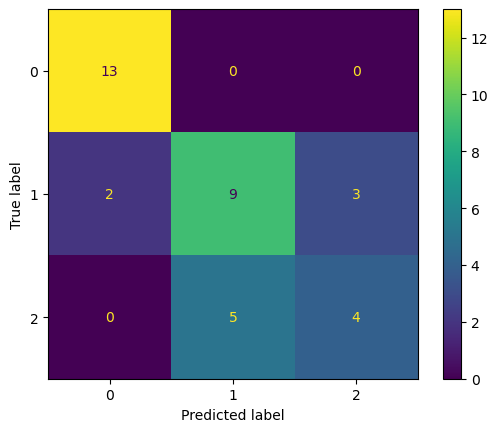

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

In [9]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP

    return TP, FN, FP, TN


def calc_confusion_vals(y_test, ypred_test):
    cm_cls_vals = {}
    for cls in range(cm.shape[0]):
        TP, FN, FP, TN = confusion_matrix_for(cls, cm)
        cm_cls_vals[cls] = {
            "TP": TP,
            "FN": FN,
            "FP": FP,
            "TN": TN
        }
        
    return cm_cls_vals

(**Optional**) Write a function `my_accuracy` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns accuracy.

In [10]:
def my_accuracy(y, pred):
    # Write your answer here

    cls = 0
    cm_cls_vals = calc_confusion_vals(y, pred)
    
    TP = cm_cls_vals[cls]["TP"]
    FN = cm_cls_vals[cls]["FN"]
    FP = cm_cls_vals[cls]["FP"]
    TN = cm_cls_vals[cls]["TN"]

    acc = (TP + TN) / (TP + FN + FP + TN)
    return acc

acc = my_accuracy(y_test, ypred_test)
print("Accuracy of my_accuracy is: ", round(acc*100, 3))

Accuracy of my_accuracy is:  94.444


(**Optional**) Write a function `my_recall_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns recall.

In [11]:
import numpy as np

def my_recall_macro(y, pred):
    recalls = []
    # cm = confusion_matrix(y, pred)

    cm_cls_vals = calc_confusion_vals(y, pred)

    for cls in cm_cls_vals:
        tp = cm_cls_vals[cls]["TP"]
        fn = cm_cls_vals[cls]["FN"]
        
        recall = tp / (tp + fn)
        recalls.append(recall)

    return np.mean(recalls)

recall = my_recall_macro(y_test, ypred_test)
print("Mean Recall is: ", round(recall, 3))

Mean Recall is:  0.696


(**Optional**) Write a function `my_precision_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns precision.

In [12]:
def my_precision_macro(y, pred):
    # Write your answer here
    precisions = []
    cm_cls_vals = calc_confusion_vals(y, pred)

    for cls in cm_cls_vals:
        tp = cm_cls_vals[cls]["TP"]
        fp = cm_cls_vals[cls]["FP"]

        precision = tp / (tp + fp)
        precisions.append(precision)

    return np.mean(precisions)

precision = my_precision_macro(y_test, ypred_test)
print("Mean Precision is:", round(precision, 3))

Mean Precision is: 0.694


(**Optional**) Check that your functions match those in sklearn.

In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
my_accuracy(y_test, ypred_test) == accuracy_score(y_test, ypred_test)

False

In [15]:
my_recall_macro(y_test, ypred_test) == recall_score(y_test, ypred_test, average='macro')

True

In [16]:
my_precision_macro(y_test, ypred_test)==precision_score(y_test, ypred_test, average='macro')

True